# $\text{AR}(1)$ with Offset

$\text{AR}(1)$ with a constant offset is defined by,

$
\begin{align}
X_t = \varphi X_{t-1} + \mu + \sigma \varepsilon_t
\end{align}
$

where, $\varepsilon \sim \text{Normal}(0,1)$

The stationarity requires $\lvert \varphi \rvert < 1$. The stationary mean and variance are given by,

$
\begin{align}
&\lim_{t \to \infty} \text{E}(X_t) = \frac{\mu}{1 - \varphi} \\
&\lim_{t \to \infty} \text{Var}(X_t) = \frac{\sigma^2}{1 - \varphi^2}
\end{align}
$

It follows that $X_t$ has distribution,

$
\begin{align}
X_t \sim \text{Normal}\left(  \frac{\mu}{1 - \varphi} ,  \frac{\sigma^2}{1 - \varphi^2} \right)
\end{align}
$

Parameter estimation is performed by subtracting the mean and using OLS on the zero mean series. Let $\hat{\mu}$ denote the estimated mean,

$
\begin{align}
\hat{\mu} = \frac{1}{n}\sum_{i=0}^n X_i
\end{align}
$

Then use $\text{AR}(1)$ parameter estimation on,

$
\begin{align}
X_t - \hat{\mu}
\end{align}
$

Then the offset is given by,

$
\begin{align}
\mu = \hat{\mu} \hat{\varphi}
\end{align}
$

where $\hat{\varphi}$ is the estimate.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib.plots.data import (DataPlotType, stack, curve)
from lib.plots.func import (FuncPlotType, fcompare)
from lib.plots.cum import (CumPlotType, cumulative)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1.0
nsample = 1000

def plot_labels_φ(φ):
    return [f"φ={val}" for val in φ]

def plot_labels_μ(μ):
    return [f"μ={val}" for val in μ]

def ar1_series_φ(φ_vals, μ):
    series = []
    for φ in φ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

def ar1_series_μ(φ, μ_vals):
    series = []
    for μ in μ_vals:
        series.append(arima.arp_offset([φ], μ, nsample, σ))
    return series

## Simulation $\varphi$ Scan

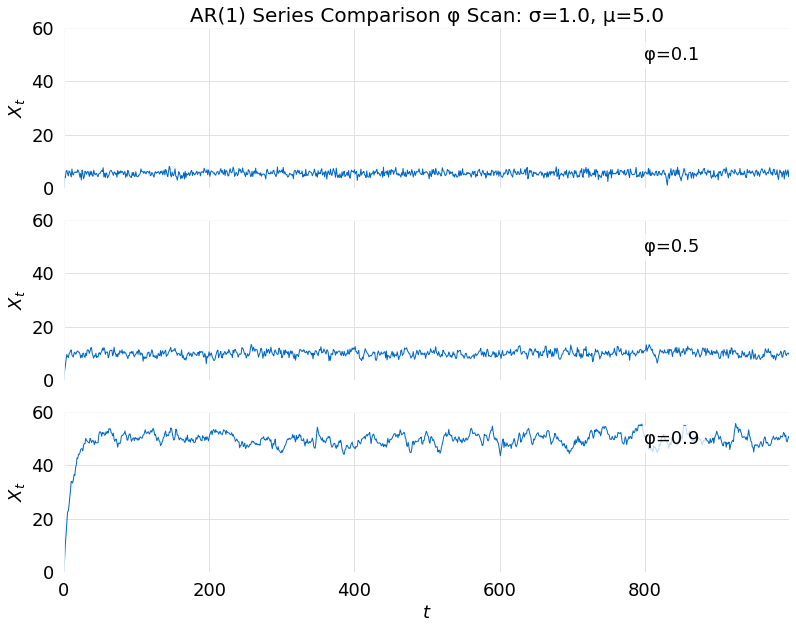

In [3]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, μ={μ}"
φ = numpy.array([0.1, 0.5, 0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[0.0, 60.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

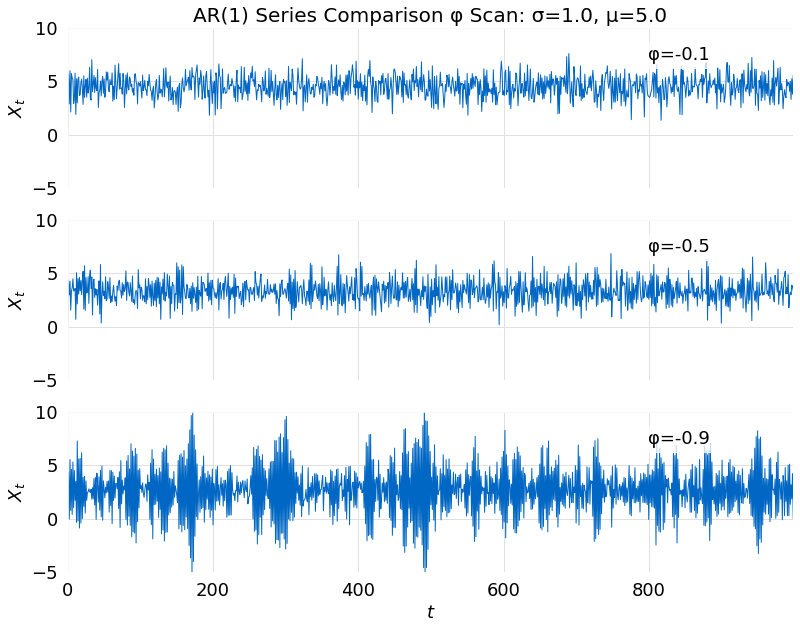

In [4]:
μ = 5.0
title = f"AR(1) Series Comparison φ Scan: σ={σ}, μ={μ}"
φ = numpy.array([-0.1, -0.5, -0.9])
labels = plot_labels_φ(φ) 
series = ar1_series_φ(φ, μ)
stack(series, ylim=[-5.0, 10.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Simulation $\mu$ Scan

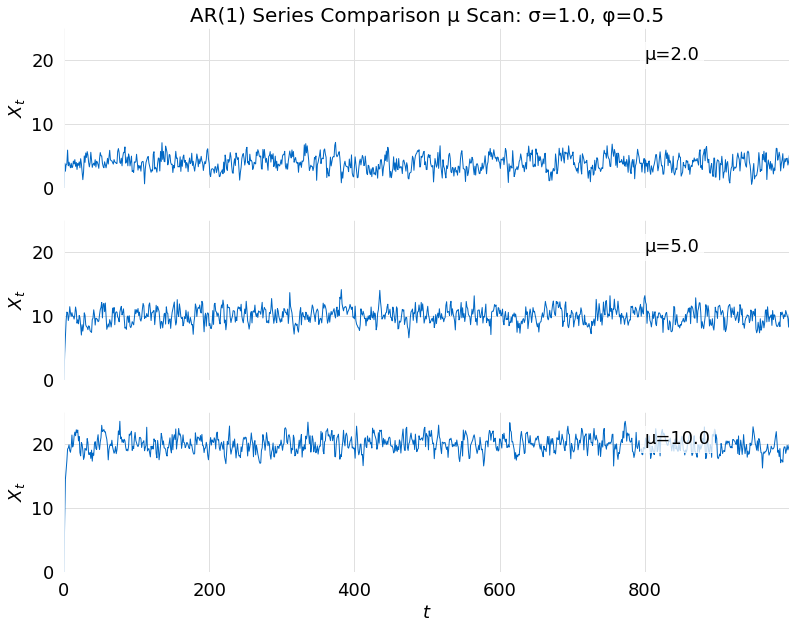

In [5]:
φ = 0.5
title = f"AR(1) Series Comparison μ Scan: σ={σ}, φ={φ}"
μ = numpy.array([2.0, 5.0, 10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[0.0, 25.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

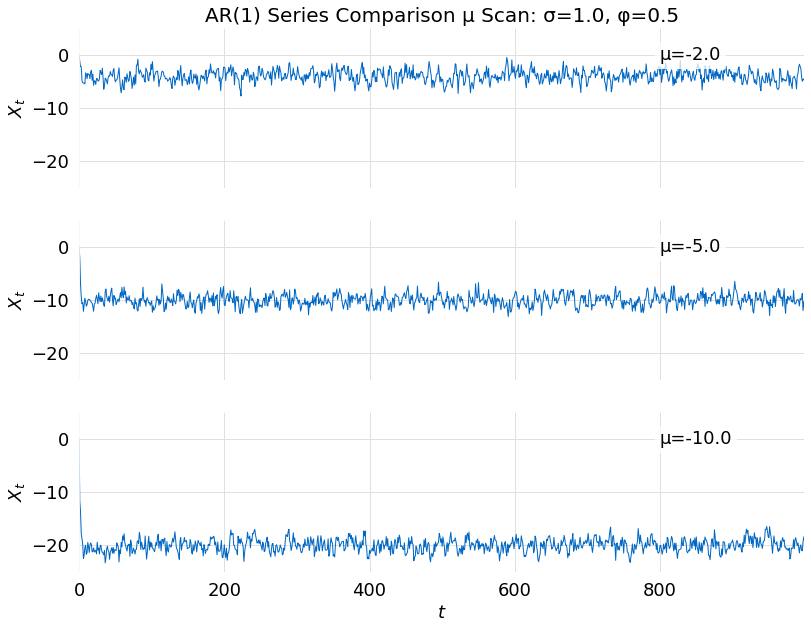

In [6]:
φ = 0.5
title = f"AR(1) Series Comparison μ Scan: σ={σ}, φ={φ}"
μ = numpy.array([-2.0, -5.0, -10.0])
labels = plot_labels_μ(μ) 
series = ar1_series_μ(φ, μ)
stack(series, ylim=[-25.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Mean

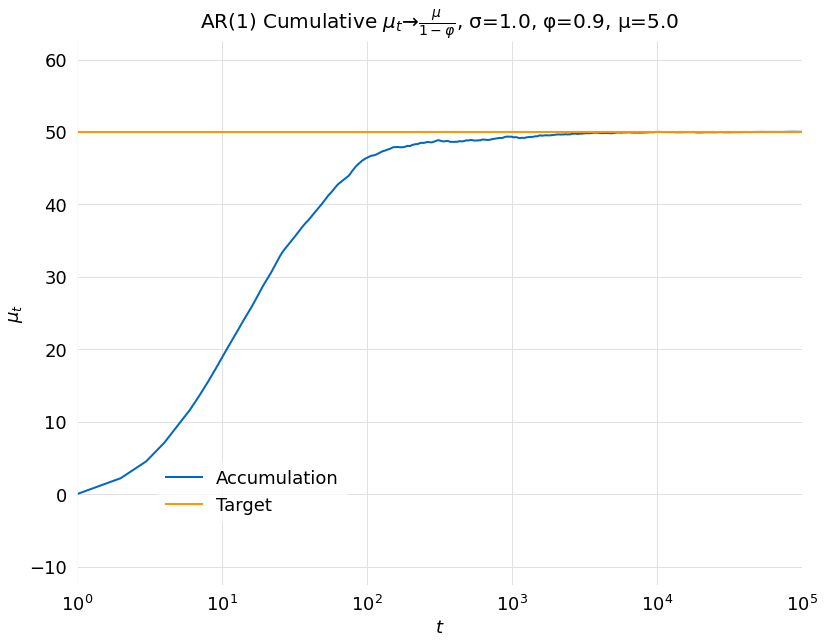

In [7]:
φ = 0.9
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

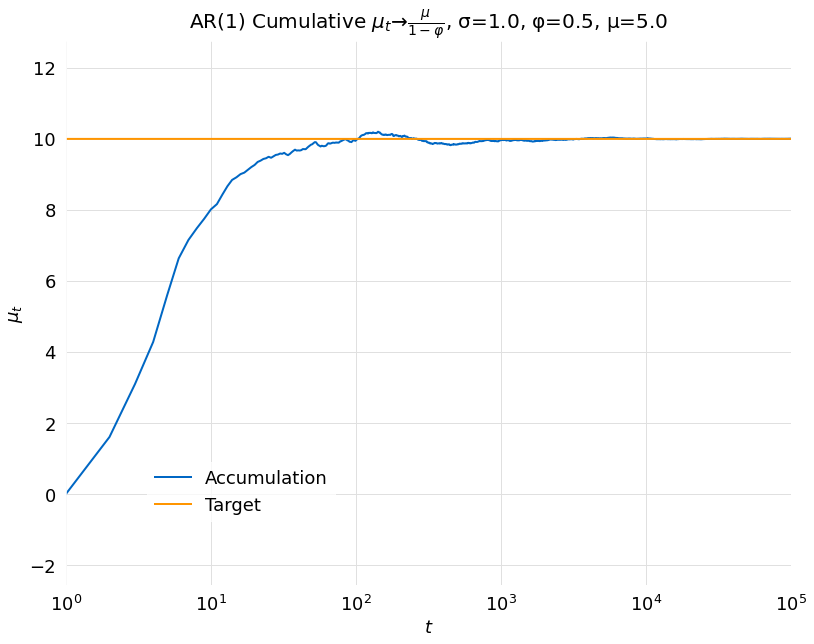

In [8]:
φ = 0.5
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

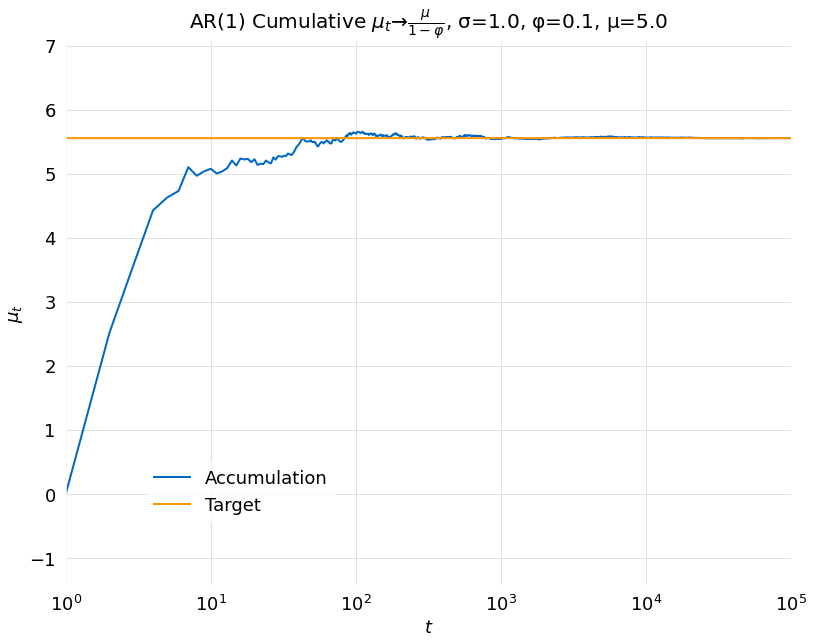

In [9]:
φ = 0.1
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

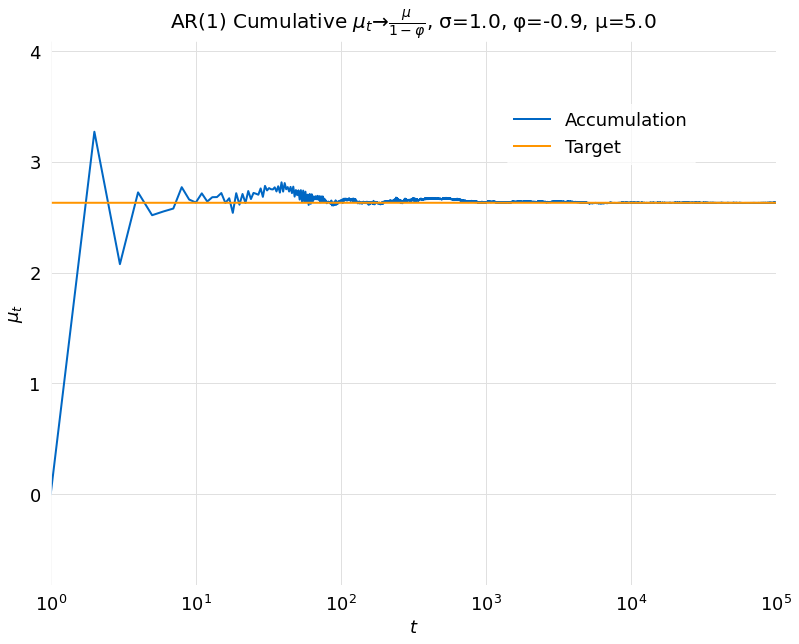

In [10]:
φ = -0.9
μ = 5.0
nsample = 100000
title = "AR(1) Cumulative " + r"$\mu_t \to \frac{\mu}{1 - \varphi}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_MEAN, title=title, params=[φ, μ])

## Standard Deviation

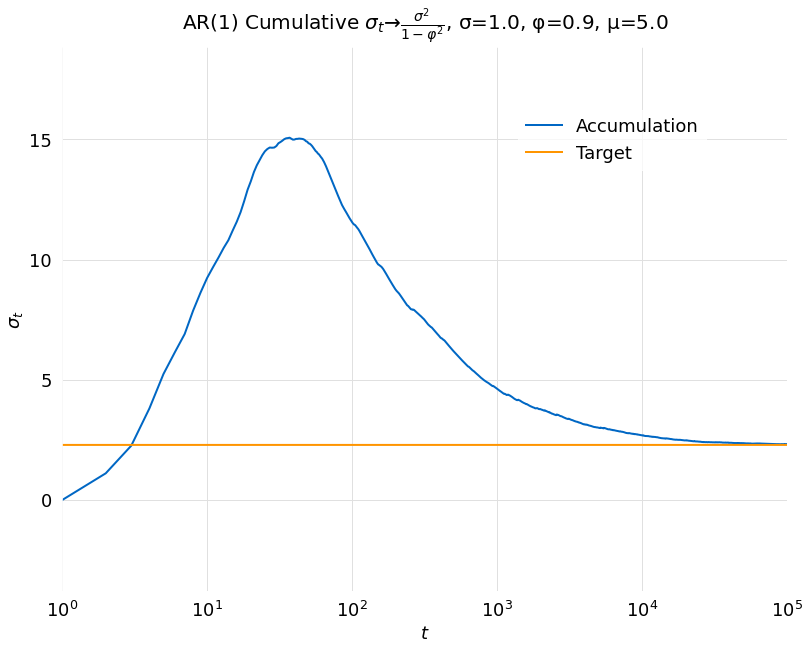

In [11]:
φ = 0.9
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

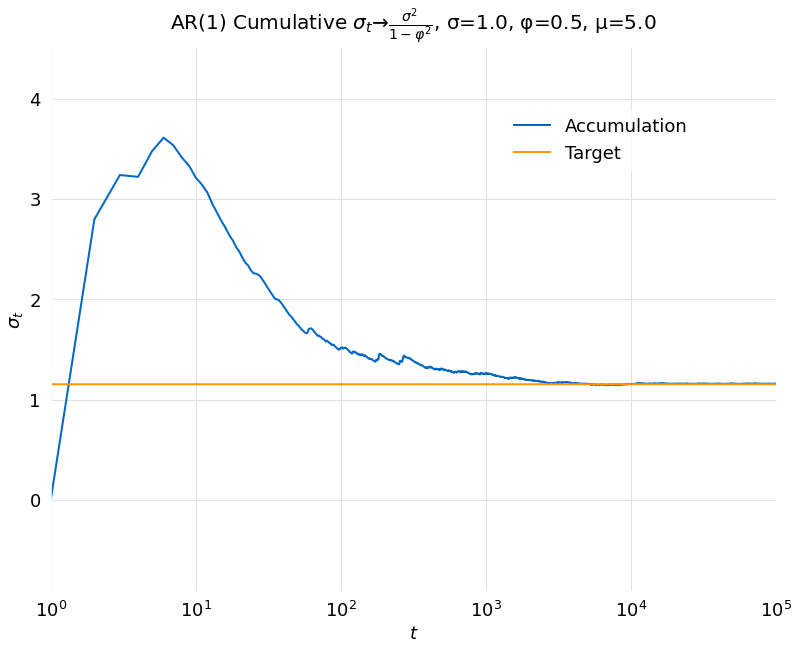

In [12]:
φ = 0.5
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

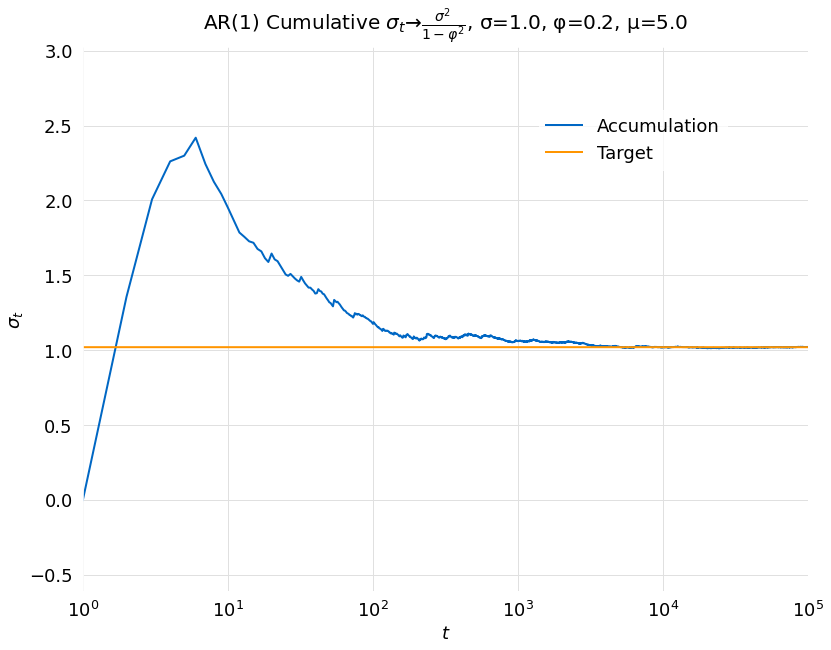

In [13]:
φ = 0.2
nsample = 100000
title = "AR(1) Cumulative " + r"$\sigma_t \to \frac{\sigma^2}{1 - \varphi^2}$, " + f"σ={σ}, φ={φ}, μ={μ}"
samples = arima.arp_offset([φ], μ, nsample, σ)
cumulative(samples, CumPlotType.AR1_OFFSET_STD, title=title, params=[φ, σ])

## Parameter Estimation

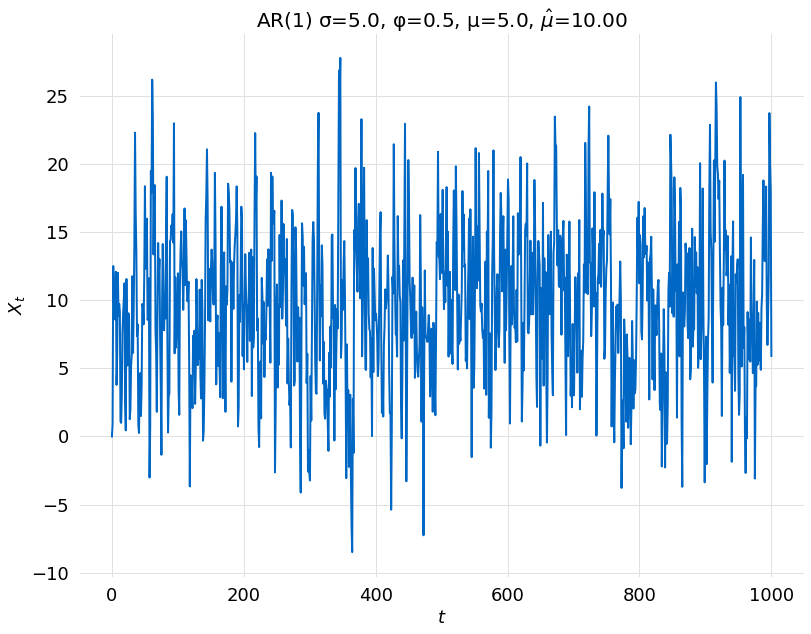

In [14]:
φ = 0.5
μ = 5.0
σ = 5.0
nsample = 1000
samples = arima.arp_offset([φ], μ, nsample, σ)
title = f"AR(1) σ={σ}, φ={φ}, μ={μ}," + r" $\hat{\mu}$=" + f"{format(μ/(1.0-φ), '4.2f')}"
curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [15]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3018.467
Date:                Fri, 15 Apr 2022   AIC                           6042.934
Time:                        10:22:34   BIC                           6057.658
Sample:                             0   HQIC                          6048.530
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5962      0.311     30.858      0.000       8.987      10.206
ar.L1          0.4972      0.026     18.986      0.000       0.446       0.548
sigma2        24.5027      1.060     23.120      0.000      22.426      26.580
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.83   Prob(JB):                         0.58
Heteroskedasticity (H):               1.09   Skew:                            -0.03
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

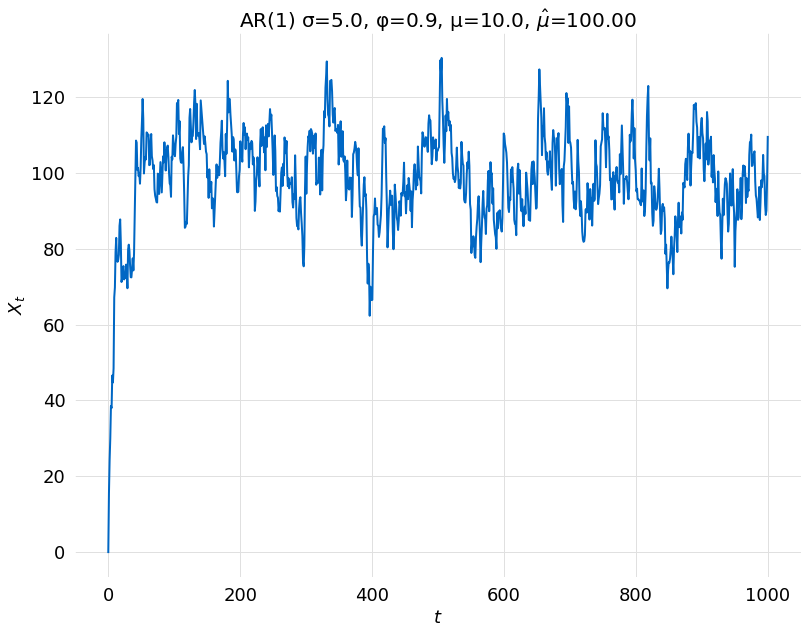

In [16]:
φ = 0.9
μ = 10.0
σ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, μ={μ}," + r" $\hat{\mu}$=" + f"{format(μ/(1.0-φ), '4.2f')}"
samples = arima.arp_offset([φ], μ, nsample, σ)
curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [17]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3065.511
Date:                Fri, 15 Apr 2022   AIC                           6137.023
Time:                        10:22:34   BIC                           6151.746
Sample:                             0   HQIC                          6142.619
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.9899      2.698     35.946      0.000      91.702     102.278
ar.L1          0.9414      0.005    187.037      0.000       0.932       0.951
sigma2        26.8697      1.179     22.799      0.000      24.560      29.180
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                79.80
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.08
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

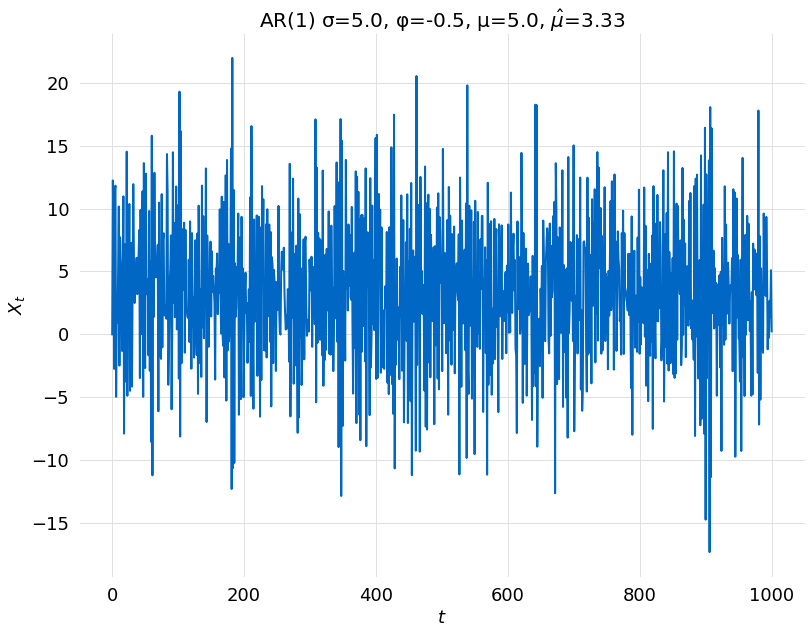

In [18]:
φ = -0.5
μ = 5.0
nsample = 1000
title = f"AR(1) σ={σ}, φ={φ}, μ={μ}," + r" $\hat{\mu}$=" + f"{format(μ/(1.0-φ), '4.2f')}"
samples = arima.arp_offset([φ], μ, nsample, σ)
curve(samples, plot_type=DataPlotType.TIME_SERIES, title=title)

In [19]:
results = arima.ar_offset_fit(samples, 1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2998.096
Date:                Fri, 15 Apr 2022   AIC                           6002.191
Time:                        10:22:34   BIC                           6016.914
Sample:                             0   HQIC                          6007.787
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3438      0.098     34.189      0.000       3.152       3.536
ar.L1         -0.5688      0.025    -22.564      0.000      -0.618      -0.519
sigma2        23.5221      1.101     21.370      0.000      21.365      25.679
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.96   Prob(JB):                         0.50
Heteroskedasticity (H):               1.05   Skew:                            -0.03
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""